# [Ex. 3 ] 

Le fichier `movie_metadata.csv` contient des informations au sujet de 5043 films qui ont été extraites de l'IMDB.

- 1.
 - a. Quels sont les 10 réalisateurs qui ont le meilleur score (`imdb_score`) moyen ?
 - b. Quels sont les 10 pays qui ont le meilleur score (`imdb_score`) moyen ?
 

- 2. 
 - a. Créer une colonne par genre (columne `genres` Action, Adventure...) qui vaut True si le film a ce genre renseigné et False sinon.
 - b. Calculer le nombre total de films par genre
 - c. Calculer l'évolution du nombre de films par genre entre 2000 et 2010
 - d. Calculer l'évolution 'Year to Year' (% d'augmentation entre année N et N+1) du nombre de films pour chaque genre.
 - e. Faire de même pour chaque pays.
  
  
- 3. On s'intéresser seulement aux films publiés après 2000.
 - a. Calculer le prix à la minute de chaque film (à partir des colonnes `budget` et `duration`)
 - b. Quels sont tous les acteurs (renseignés dans les colonnes `actor_X_name`) qui ont joué dans les films qui ont un prix à la minute dans les 10% les plus élevés ? 


- 4. 
 - a. Quels sont les réalisateurs dont les films ont la rentabilité moyenne (`gross` / `budget`) la plus élevée ?
 - b. Même question pour les pays.


- 5. 
 - a. Plusieurs utilisateurs de l'IMDB ont reporté que les notes seraient gonflées depuis quelques années. Que peut-on calculer pour essayer de s'en assurer ? Proposer deux méthodes.
 - b. Implémenter ces deux méthodes.


- 6. Bâtir un modèle de prédiction de la variable `imdb_score` sur la base des autres variables et des données disponibles a priori (ie, pour réaliser la prédiction d'un film sorti en 2010, on peut utiliser toutes les statistiques des films sortis en 2009)


In [431]:
df = pd.read_csv("../data/imdb/movie_metadata.csv")

In [432]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

### Question 2 (méthode 1 - à la main)

In [433]:
import pandas as pd
df = pd.read_csv("../data/imdb/movie_metadata.csv")

# Toutes les valeurs uniques de genre
genres_concatenated = "|".join(df["genres"].tolist())
genres_unique = list(set(genres_concatenated.split("|")))

df["genres"] = df["genres"].str.split("|")  # équivalent à df["genres"].map(lambda s: s.split("|"))

for genre_to_test in genres_unique:
    df[genre_to_test] = df["genres"].map(
        lambda genres_from_movie: genre_to_test in genres_from_movie
    )
    
df[genres_unique].sum().sort_values(ascending=False) # axis=0 param by default

Drama          2594
Comedy         1872
Thriller       1411
Action         1153
Romance        1107
Adventure       923
Crime           889
Sci-Fi          616
Fantasy         610
Horror          565
Family          546
Mystery         500
Biography       293
Animation       242
Music           214
War             213
History         207
Sport           182
Musical         132
Documentary     121
Western          97
Film-Noir         6
Short             5
News              3
Reality-TV        2
Game-Show         1
dtype: int64

#### Question 2 (méthode 2 - Usage "intermédiaire" de pd.get_dummies)

In [434]:
import pandas as pd
df = pd.read_csv("../data/imdb/movie_metadata.csv")
# Longue une explication sur cette ligne
genres = df['genres'].str.get_dummies("|")
df = pd.concat([df, genres], axis=1)
genres.sum()

Action         1153
Adventure       923
Animation       242
Biography       293
Comedy         1872
Crime           889
Documentary     121
Drama          2594
Family          546
Fantasy         610
Film-Noir         6
Game-Show         1
History         207
Horror          565
Music           214
Musical         132
Mystery         500
News              3
Reality-TV        2
Romance        1107
Sci-Fi          616
Short             5
Sport           182
Thriller       1411
War             213
Western          97
dtype: int64

#### Explications .str.get_dummies

In [435]:
# Get dummies dans le cas simple : 
df = pd.DataFrame({"train": pd.Series([1, 2, 1, 2, 4, 2, 1, 2, 3, 1])})
df["train"] = df["train"].map(lambda i: f"train_{i}")
df = pd.concat([
    pd.get_dummies(df["train"]), 
    df["train"]], axis=1
)

In [436]:
df = pd.DataFrame({"train": pd.Series([1, 2, 1, 2, 4, 2, 1, 2, 3, 1])})
df["train_other"] = df["train"] + 2
df["train"] = df["train"].map(lambda i: f"train_{i}")
df["train_other"] = df["train_other"].map(lambda i: f"train_{i}")
df["train_new"] = df["train"] + "|" + df["train_other"]
df = pd.concat([
    df["train_new"].str.get_dummies("|"), df["train_new"]
], axis=1)
df

,train_1,train_2,train_3,train_4,train_5,train_6,train_new
0,1,0,1,0,0,0,train_1|train_3
1,0,1,0,1,0,0,train_2|train_4
2,1,0,1,0,0,0,train_1|train_3
3,0,1,0,1,0,0,train_2|train_4
4,0,0,0,1,0,1,train_4|train_6
5,0,1,0,1,0,0,train_2|train_4
6,1,0,1,0,0,0,train_1|train_3
7,0,1,0,1,0,0,train_2|train_4
8,0,0,1,0,1,0,train_3|train_5
9,1,0,1,0,0,0,train_1|train_3


#### Question 3

Augmentation du #films entre l'année 2000 et 2010 34.01 % 


<AxesSubplot:>

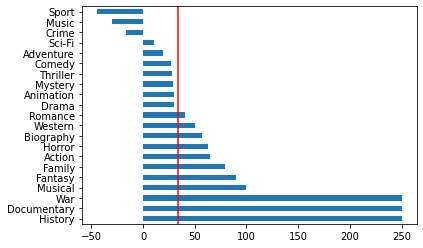

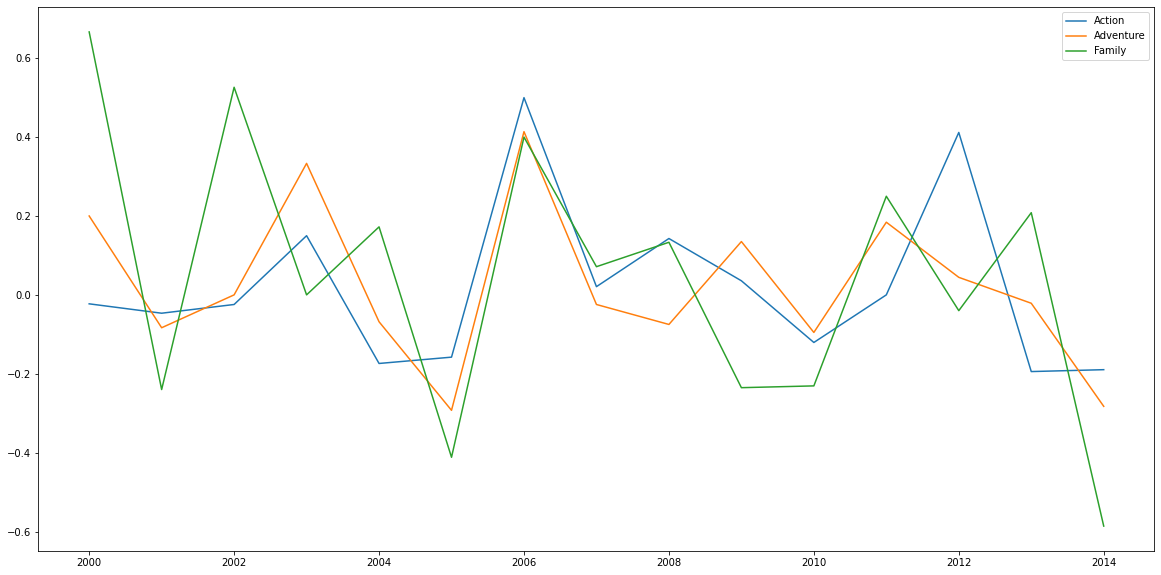

In [437]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("../data/imdb/movie_metadata.csv")

def get_genre_counts_for_year(df, year):
    genres = df[df.title_year==year]['genres'].str.get_dummies("|")
    df = pd.concat([df, genres], axis=1)
    return genres.sum()

genre_counts_2000 = get_genre_counts_for_year(df, 2000)
genre_counts_2010 = get_genre_counts_for_year(df, 2010)

# Est-on sûr que les genres sont les mêmes dans les deux Séries ?
# -> non, mais c'est bien le cas après vérification
# on vérifie différence symétrique vide
assert len([g for g in genre_counts_2010.index if g not in genre_counts_2000.index]) == 0

# On a les mêmes indexes ?
# on le test ainsi : 
assert all(genre_counts_2000.index == genre_counts_2010.index)

counts = pd.DataFrame({"2000": genre_counts_2000, "2010": genre_counts_2010})


# EVOLUTION GLOBALE #FILMS:
evol_globale = 100*(counts["2010"].sum() - counts["2000"].sum()) / counts["2000"].sum()
print("Augmentation du #films entre l'année 2000 et 2010", round(evol_globale, 2), "% ")

# (1+evol)* V_2000 = V_2010
# evol = (V_2010 - V_2000) / V_2000
counts["evol"] = 100*(counts["2010"] - counts["2000"]) / counts["2000"]

counts["evol"].sort_values(ascending=False).plot.barh()
plt.axvline(evol_globale, color="red")



#################### Calcul de l'année 2000 à 2010


df = pd.read_csv("../data/imdb/movie_metadata.csv")
# Longue une explication sur cette ligne
genres = df['genres'].str.get_dummies("|")
df = pd.concat([df, genres], axis=1)



genre_counts = df.groupby("title_year")[genres.columns].sum().T
genre_counts.columns = genre_counts.columns.map(lambda i : str(int(i)))

def evol_year_to_year_plus_1(genre_counts:pd.DataFrame, year:int):
        year_str = str(year)
        year_plus_1_str = str(year + 1)
        return (genre_counts[year_plus_1_str] - genre_counts[year_str]) / genre_counts[year_str]
    
evols = pd.DataFrame(
    [
        evol_year_to_year_plus_1(genre_counts, year) 
        for year in range(2001, 2016)
    ])
evols.index = range(2000, 2015)
evols[["Action", "Adventure", "Family"]].plot(figsize=(20, 10))

#### Question bonus
- 1. Créer une série avec en index les années et en valeur : le nom du genre qui a le nombre de films le plus élevés
- 2. Si égalité, on veut tous les genres concaténés par un '|'

In [438]:
import pandas as pd
df = pd.read_csv("../data/imdb/movie_metadata.csv")
# Longue une explication sur cette ligne
genres = df['genres'].str.get_dummies("|")
df = pd.concat([df, genres], axis=1)
genre_counts = df.groupby("title_year")[genres.columns].sum()
most_popular_genre_per_year = genre_counts.idxmax(axis=1)

In [439]:
# https://stackoverflow.com/questions/39874501/get-column-names-for-max-values-over-a-certain-row-in-a-pandas-dataframe
    
test = pd.DataFrame({'col1':[1,2,3],'col2':[3,2,1],'col3':[1,1,1]},index= ['row1','row2','row3'])

def get_column_name_for_max_values_of(row):
    # Foinctionne, mais pq prendre toutes les lignes...............
    return test.loc[:,test.loc[row] == test.loc[row].max()].columns.tolist()


# On l'adapte car c'est du n'importe quoi....
def get_column_name_for_max_values_of(df_, idx_row):
    mask_columns = df_.loc[idx_row] == df_.loc[idx_row].max()
    return mask_columns[mask_columns].index.tolist()

get_column_name_for_max_values_of(df_=test, idx_row='row2')


most_popular_genres = [
    get_column_name_for_max_values_of(genre_counts, idx_row)
    for idx_row in genre_counts.index
]
most_popular_genres = pd.Series(most_popular_genres, index=genre_counts.index)

#### Question 3.a

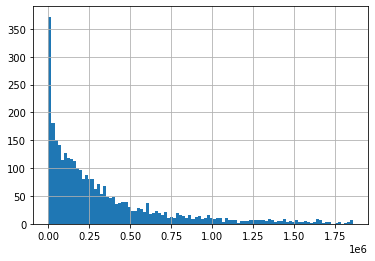

In [440]:
moves_after_2000 = df[df.title_year >= 2000].copy()

moves_after_2000["dollars_per_minute"] = moves_after_2000["budget"] / moves_after_2000["duration"]

# BUT : on ne voit rien sur l'histogramme car il y a des valeurs peu nombreuses très hautes
# qui étire l'axe des x : on veut régler ça
# Classe selon prix à la minute

# on classe selon le prix à la minute
moves_after_2000 = moves_after_2000.sort_values("dollars_per_minute", ascending=True) 
# on sélectionne les 95% du début de la dataframe (valeurs les moins hautes)
moves_after_2000_without_outliers = moves_after_2000.iloc[0: int(0.90*len(moves_after_2000))]
# Histogramme
moves_after_2000_without_outliers.dollars_per_minute.hist(bins=100)# On représente l'histogramme
plt.show()

#### Question 3.b

In [441]:
# On classe par prix à la minute puis on prends les "10% prmeières lignes"
actor_columns = ["actor_1_name", "actor_2_name", "actor_3_name"]
df_actors = moves_after_2000.sort_values("dollars_per_minute", ascending=False).head(int(0.1*len(moves_after_2000)))[actor_columns]

# Apply 
df_actors.apply(set, axis=0).tolist() # est une liste de set
actors = {
    actor 
    for set_of_actors in df_actors.apply(set, axis=0).tolist() 
    for actor in set_of_actors
}

# Explication
# how to flatten a list of list
list_of_list = [[1, 2], [3, 4]]
flat_list = [value for sublist in list_of_list for value in sublist]
flat_list

[1, 2, 3, 4]

#### Question 4 a.

In [442]:
df["r"] = 100*(df["gross"] / df["budget"]) - 1 # rentabilité au sens financier
# groupe sur le réalisateur, sélectionne la rentatbilité r, calcul la moyenne par réalisateur, et tri en descending
df.groupby("director_name").r.mean().sort_values(ascending=False).head(20)

director_name
Oren Peli            719447.553333
Jonathan Caouette    271565.055046
Daniel Myrick        234215.856667
Travis Cluff          22756.819000
Edward Burns          13768.103673
Tobe Hooper           12587.116922
William Cottrell       9245.274250
Joe Camp               7909.520000
Jafar Panahi           6736.800000
Alex Kendrick          6196.023283
Shane Carruth          6067.000000
Morgan Spurlock        6021.929346
Jared Hess             5691.928864
Robert Townsend        5227.617000
John G. Avildsen       4826.334965
John Carpenter         4027.914917
George Lucas           4001.030958
Alfred Hitchcock       3964.564033
Neil LaBute            3902.274036
John 'Bud' Cardos      3399.000000
Name: r, dtype: float64

#### Question 4 b.

In [443]:
df.groupby("country").r.mean().sort_values(ascending=False).head(20)

country
Afghanistan      2449.719565
Iran             2168.688370
Philippines      1000.014286
Ireland           799.772778
USA               743.187134
Taiwan            427.937880
Indonesia         372.193000
Argentina         369.503914
Canada            315.113038
Italy             227.825184
Colombia          216.239933
Mexico            214.913455
South Africa      187.697181
UK                184.093935
Romania           170.390876
Australia         167.704200
New Zealand       162.479721
France            134.920926
Official site     133.792807
Peru              126.472402
Name: r, dtype: float64

#### Question 5

##### Méthode 1
- Grouper les films par groupes de n années consécutives (n=2, ou n=5, ou n=10)
- Calculer la médiane par groupes d'années
- Observer l'évolution de la médiane par goupe d'années

- Faire la même chose pour ces deux groupes  : 
    - 1 goupe constitué de pays occidentaux
    - 1 groupe constitué d'autres pays
    
- ou groupes plus compliqués en regardant un genre 



##### Méthode 2
- Exploiter le fait que les réalisateurs hyperprolifiques (par exemple type Série B dans les années 70-80) ont généralement fait des films qui recueillent des mauvaises notes. Vérifier si ces notes n'auraient pas augmenté avec le temps

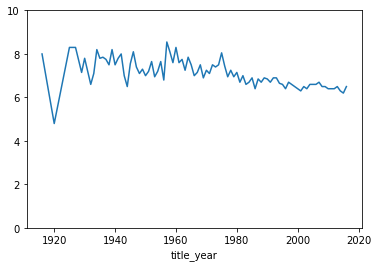

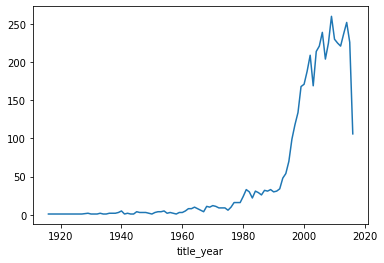

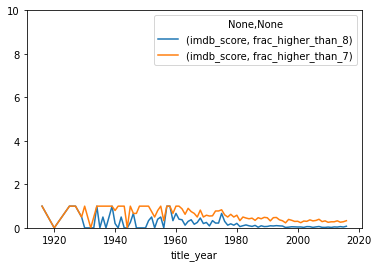

In [507]:
subset = df#[df["genres"].str.contains("Action")]

n = 2
# 1 groupe toutes les n années
subset["title_year_group_10y"] = subset.title_year.map(lambda y: y - y % n)

imdb_score_median_per_year = subset.groupby("title_year").imdb_score.median()
imdb_score_median_per_year.plot()
plt.ylim(0, 10)
plt.show()

# count : donc colonne sans valeurs nulles
movie_count_per_year = subset.groupby("title_year").movie_title.count() 
movie_count_per_year.plot()

def count_higher_than_threshold(serie, threshold):
    scores = list(serie)
    return len([s for s in scores if s >= threshold]) 

def count_higher_than_8(x):
    return count_higher_than_threshold(x, 8)

def count_higher_than_7(x):
    return count_higher_than_threshold(x, 7)


def frac_higher_than_threshold(serie, threshold):
    scores = list(serie)
    return len([s for s in scores if s >= threshold]) / len(scores)
    
def frac_higher_than_8(x):
    return frac_higher_than_threshold(x, 8)

def frac_higher_than_7(x):
    return frac_higher_than_threshold(x, 7)

    
subset.groupby("title_year").agg({"imdb_score": [frac_higher_than_8, frac_higher_than_7] }).plot()
plt.ylim(0, 10)
plt.show()

In [518]:
# Calculer les proportions de films et non plus les comptes
# Filtrer sur des variables comme le pays pour trouver des groupes
# au sein desquels une surnotation semble apparaître au cours des années 2000

# FILTRER SUR UN GENRE (ou sur des genres)
genre = "Adventure"
subset = df[df["genres"].str.contains(genre)]
subset = subset[subset["country"]=="USA"]


# On calcule des groupes d'années
n = 5
# 1 groupe toutes les n années
subset["title_year_group"] = subset.title_year.map(lambda y: y - y % n)


In [519]:

def get_count_per_group_year(df_):
    return df_.groupby("title_year_group").imdb_score.count()

def get_count_above_7_per_group_year(df_):
    return df_.groupby("title_year_group").agg({"imdb_score": lambda x: len([s for s in x if s >= 7])}).imdb_score

def get_count_per_group_year_if_in_top20_group_year(df_):
    df_["budget_threshold_top20_group_year"] = df_.groupby("title_year_group").budget.transform(lambda x:  np.nanpercentile(x, 80))
    df_ = df_[df_.budget > df_.budget_threshold_top20_group_year]
    return df_.groupby("title_year_group").imdb_score.count()

def get_count_above_7_per_group_year_if_in_top20_group_year(df_):
    df_["budget_threshold_top20_group_year"] = df_.groupby("title_year_group").budget.transform(lambda x:  np.nanpercentile(x, 80))
    df_ = df_[df_.budget > df_.budget_threshold_top20_group_year]
    return df_.groupby("title_year_group").agg({"imdb_score": lambda x: len([s for s in x if s >= 7])}).imdb_score


counts = get_count_per_group_year(subset)

counts_above_7 = get_count_above_7_per_group_year(subset)

counts_top20_per_group_year = get_count_per_group_year_if_in_top20_group_year(subset)

counts_above_7_top20_per_group_year = get_count_above_7_per_group_year_if_in_top20_group_year(subset)



<AxesSubplot:xlabel='title_year_group'>

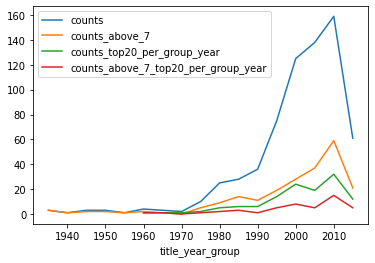

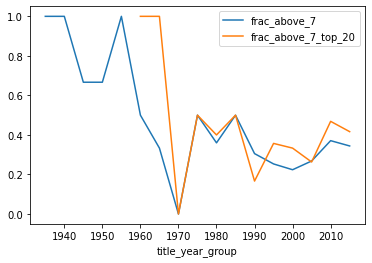

In [520]:
stats = pd.DataFrame({
    "counts": counts,
    "counts_above_7": counts_above_7,
    "counts_top20_per_group_year": counts_top20_per_group_year,
    "counts_above_7_top20_per_group_year": counts_above_7_top20_per_group_year
})

stats.plot()


stats["frac_above_7"] = stats.counts_above_7 / stats.counts
stats["frac_above_7_top_20"] = stats.counts_above_7_top20_per_group_year / stats.counts_top20_per_group_year

stats[['frac_above_7', 'frac_above_7_top_20']].plot()